In [128]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [129]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Alz_data.zip"
!unzip -qo Alz_data.zip 
!rm Alz_data.zip

--2021-07-17 08:22:43--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Alz_data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.16
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35524854 (34M) [application/x-zip-compressed]
Saving to: ‘Alz_data.zip’

Alz_data.zip        100%[===================>]  33.88M  7.81MB/s    in 4.3s    

2021-07-17 08:22:49 (7.81 MB/s) - ‘Alz_data.zip’ saved [35524854/35524854]



In [130]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [131]:
train='Alzheimer_s Dataset/train/'

In [132]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [133]:
val='Alzheimer_s Dataset/train/'

In [134]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [135]:
test='Alzheimer_s Dataset/test/'

In [136]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [137]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [138]:
train_data.class_names = class_names
val_data.class_names = class_names

In [139]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


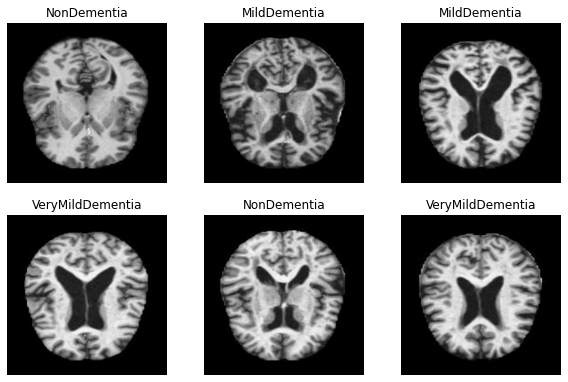

In [140]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [141]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)      

In [142]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [143]:
history = model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
129/129 [==============================] - 9s 66ms/step - loss: 1.6475 - accuracy: 0.4428 - val_loss: 0.9420 - val_accuracy: 0.5254
Epoch 2/15
129/129 [==============================] - 9s 66ms/step - loss: 0.9838 - accuracy: 0.5253 - val_loss: 0.8532 - val_accuracy: 0.5850
Epoch 3/15
129/129 [==============================] - 9s 67ms/step - loss: 0.9076 - accuracy: 0.5619 - val_loss: 0.7933 - val_accuracy: 0.6162
Epoch 4/15
129/129 [==============================] - 9s 66ms/step - loss: 0.8485 - accuracy: 0.6039 - val_loss: 0.7193 - val_accuracy: 0.6846
Epoch 5/15
129/129 [==============================] - 8s 63ms/step - loss: 0.7668 - accuracy: 0.6561 - val_loss: 0.6681 - val_accuracy: 0.7080
Epoch 6/15
129/129 [==============================] - 9s 68ms/step - loss: 0.6148 - accuracy: 0.7388 - val_loss: 0.4661 - val_accuracy: 0.8232
Epoch 7/15
129/129 [==============================] - 9s 66ms/step - loss: 0.4569 - accuracy: 0.8182 - val_loss: 0.4590 - val_accuracy: 0.8232

In [144]:
model.save("alz_model1.h5")

In [145]:
model.evaluate(val_data)

32/32 [==============================] - 1s 38ms/step - loss: 0.0766 - accuracy: 0.9756


[0.07659430801868439, 0.9755859375]

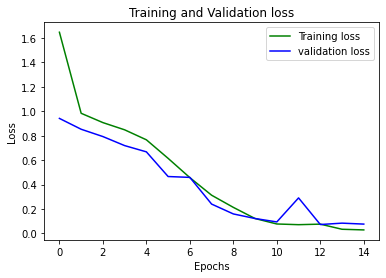

In [146]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

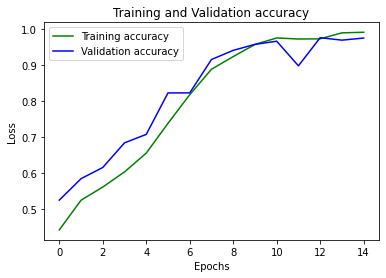

In [147]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [148]:
class_names={0:"MildDementia", 1:"ModerateDementia", 2:"NonDementia", 3:"VeryMildDementia"}

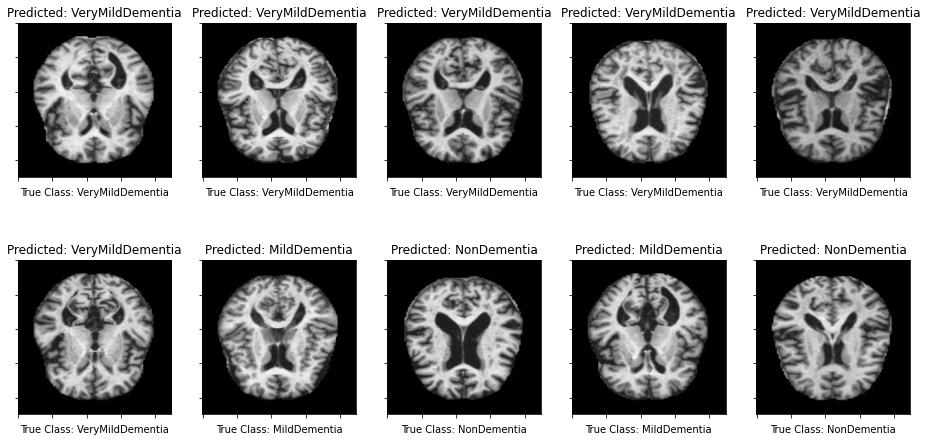

In [149]:
plt.figure(figsize=(16,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))          